In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# 1. Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final. Ensure to keep all customers who have done transactions with us and select the join type accordingly.

In [3]:
prod_cat_info = pd.read_csv('C:/Users/ZomAdmin/Desktop/New folder/New folder/Data Science with python/Python Session 5/Main case submission/3. Pandas Case Study 1 - Retail Case Study (1)/3. Pandas Case Study 1 - Retail Case Study/prod_cat_info.csv')
Transactions = pd.read_csv('C:/Users/ZomAdmin/Desktop/New folder/New folder/Data Science with python/Python Session 5/Main case submission/3. Pandas Case Study 1 - Retail Case Study (1)/3. Pandas Case Study 1 - Retail Case Study/Transactions.csv')
Customer = pd.read_csv('C:/Users/ZomAdmin/Desktop/New folder/New folder/Data Science with python/Python Session 5/Main case submission/3. Pandas Case Study 1 - Retail Case Study (1)/3. Pandas Case Study 1 - Retail Case Study/Customer.csv')

In [14]:
prod_cat_info.head(2)

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women


In [4]:
Customer.head(2)

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0


In [5]:
Transactions.head(2)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop


**Lets begin the merging process here**

In [6]:
Customer.columns

Index(['customer_Id', 'DOB', 'Gender', 'city_code'], dtype='object')

In [7]:
Transactions.columns

Index(['transaction_id', 'cust_id', 'tran_date', 'prod_subcat_code',
       'prod_cat_code', 'Qty', 'Rate', 'Tax', 'total_amt', 'Store_type'],
      dtype='object')

In [4]:
A1 = pd.merge(left = Transactions, right = Customer,how = 'left',left_on='cust_id',right_on='customer_Id')

In [5]:
A1.head(2)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,270351,26-09-1981,M,5.0
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,270384,11-05-1973,F,8.0


In [ ]:
A1.columns

In [6]:
Customer_Final = pd.merge(left = A1, right = prod_cat_info,how = 'left',left_on=['prod_subcat_code','prod_cat_code'],
         right_on=['prod_sub_cat_code','prod_cat_code'])

In [7]:
Customer_Final.head(2)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_sub_cat_code,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,270351,26-09-1981,M,5.0,Clothing,1,Women
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,270384,11-05-1973,F,8.0,Electronics,5,Computers


# 2. Prepare a summary report for the merged data set.

# a. Get the column names and their corresponding data types

# b. Top/Bottom 10 observations

# c. “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)

# d. Frequency tables for all the categorical variables



In [9]:
#Get the column names and their corresponding data types
Customer_Final.dtypes

transaction_id         int64
cust_id                int64
tran_date             object
prod_subcat_code       int64
prod_cat_code          int64
Qty                    int64
Rate                   int64
Tax                  float64
total_amt            float64
Store_type            object
customer_Id            int64
DOB                   object
Gender                object
city_code            float64
prod_cat              object
prod_sub_cat_code      int64
prod_subcat           object
dtype: object

In [10]:
##Top/Bottom 10 observations
Customer_Final.head(10)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_sub_cat_code,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,270351,26-09-1981,M,5.0,Clothing,1,Women
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,270384,11-05-1973,F,8.0,Electronics,5,Computers
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,273420,27-07-1992,M,8.0,Books,6,DIY
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,271509,08-06-1981,M,3.0,Home and kitchen,11,Bath
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,273420,27-07-1992,M,8.0,Books,6,DIY
5,97439039119,272357,23-02-2014,8,3,-2,-824,173.040,-1821.040,TeleShop,272357,09-10-1982,F,6.0,Electronics,8,Personal Appliances
6,45649838090,273667,22-02-2014,11,6,-1,-1450,152.250,-1602.250,e-Shop,273667,29-05-1981,M,9.0,Home and kitchen,11,Bath
7,22643667930,271489,22-02-2014,12,6,-1,-1225,128.625,-1353.625,TeleShop,271489,21-04-1971,M,9.0,Home and kitchen,12,Tools
8,79792372943,275108,22-02-2014,3,1,-3,-908,286.020,-3010.020,MBR,275108,04-11-1971,F,8.0,Clothing,3,Kids
9,50076728598,269014,21-02-2014,8,3,-4,-581,244.020,-2568.020,e-Shop,269014,27-11-1979,F,3.0,Electronics,8,Personal Appliances


In [20]:
##Top/Bottom 10 observations
Customer_Final.tail(10)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_sub_cat_code,prod_subcat
23043,49882891062,271982,25-01-2011,10,5,4,1330,558.600,5878.600,e-Shop,271982,10-08-1976,M,8.0,Books,10,Non-Fiction
23044,14787475597,273982,25-01-2011,4,3,5,969,508.725,5353.725,e-Shop,273982,12-10-1991,M,4.0,Electronics,4,Mobiles
23045,50691119572,273031,25-01-2011,6,5,1,1148,120.540,1268.540,TeleShop,273031,17-01-1980,F,8.0,Books,6,DIY
23046,40893803228,272049,25-01-2011,11,6,3,1077,339.255,3570.255,e-Shop,272049,28-06-1975,F,6.0,Home and kitchen,11,Bath
23047,30856003613,266866,25-01-2011,4,2,2,444,93.240,981.240,TeleShop,266866,18-04-1974,M,4.0,Footwear,4,Kids
23048,94340757522,274550,25-01-2011,12,5,1,1264,132.720,1396.720,e-Shop,274550,21-02-1972,M,7.0,Books,12,Academic
23049,89780862956,270022,25-01-2011,4,1,1,677,71.085,748.085,e-Shop,270022,27-04-1984,M,9.0,Clothing,4,Mens
23050,85115299378,271020,25-01-2011,2,6,4,1052,441.840,4649.840,MBR,271020,20-06-1976,M,8.0,Home and kitchen,2,Furnishing
23051,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop,270911,22-05-1970,M,2.0,Books,11,Children
23052,77960931771,271961,25-01-2011,11,5,1,447,46.935,493.935,TeleShop,271961,15-01-1982,M,1.0,Books,11,Children


In [21]:
###Here we have created a UDF to get 5 point summary:
def func_nam(x):

        
    return pd.Series([x.max(),x.min,x.quantile(0.5),x.quantile(0.25),x.quantile(0.75)],
    index = ['max','min','Median','Q1','Q3'])
            
        

In [22]:
# c. “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)
round(Customer_Final.select_dtypes(['int64','float64']).apply(func_nam),2).T

,max,min,Median,Q1,Q3
transaction_id,99987549630,<bound method Series.min of 0 807121904...,5.00931e+10,2.49386e+10,7.533e+10
cust_id,275265,<bound method Series.min of 0 270351\n1...,270980,268935,273114
prod_subcat_code,12,<bound method Series.min of 0 1\n1 ...,5,3,10
prod_cat_code,6,<bound method Series.min of 0 1\n1 ...,4,2,5
Qty,5,<bound method Series.min of 0 -5\n1 ...,3,1,4
Rate,1500,<bound method Series.min of 0 -772\n1 ...,710,312,1109
Tax,787.5,<bound method Series.min of 0 405.300\n...,199.08,98.28,365.715
total_amt,8287.5,<bound method Series.min of 0 -4265.300\...,1754.74,762.45,3569.15
customer_Id,275265,<bound method Series.min of 0 270351\n1...,270980,268935,273114
city_code,10,<bound method Series.min of 0 5.0\n1 ...,5,3,8


**# d. Frequency tables for all the categorical variables**

In [97]:
Customer_Final.select_dtypes('object').describe().T

,count,unique,top,freq
tran_date,23053,1129,13-07-2011,35
Store_type,23053,4,e-Shop,9311
DOB,23053,3987,17-09-1982,32
Gender,23044,2,M,11811
prod_cat,23053,6,Books,6069
prod_subcat,23053,18,Women,3048


## 3. Generate histograms for all continuous variables and frequency bars for categorical variables.

In [8]:
def fn_distribution_chart( x ):
    
    plt.figure(figsize=(5, 3))
    plt.title('This is an hist for ' + x.name)
    x.hist()
    plt.show()
    
    return None

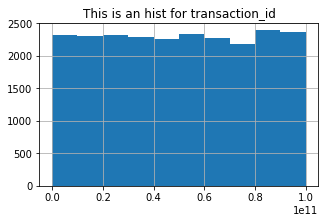

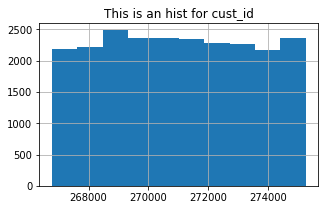

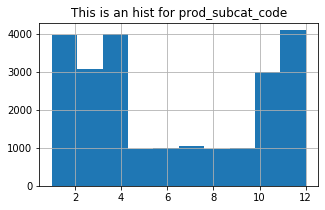

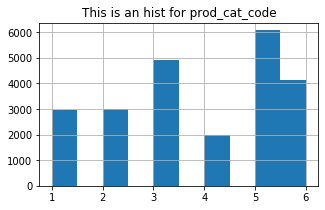

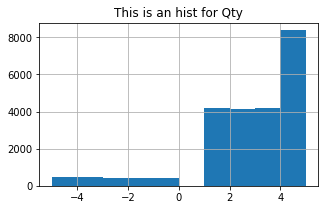

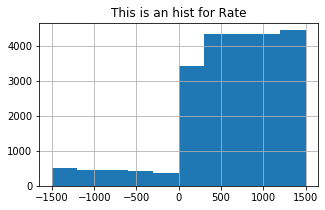

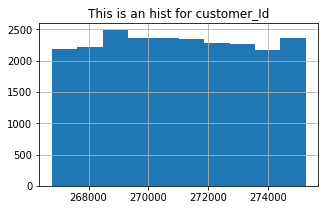

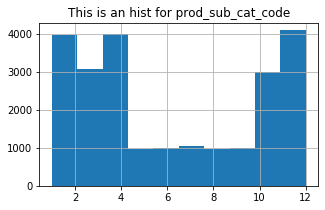

transaction_id       None
cust_id              None
prod_subcat_code     None
prod_cat_code        None
Qty                  None
Rate                 None
customer_Id          None
prod_sub_cat_code    None
dtype: object


In [9]:
##Histogram for continous variable:
print(Customer_Final.select_dtypes('int64','float64').apply(lambda x: fn_distribution_chart(x)))


In [99]:
C1=Customer_Final.select_dtypes('object')

In [100]:
C1.head(1)

,tran_date,Store_type,DOB,Gender,prod_cat,prod_subcat
0,28-02-2014,e-Shop,26-09-1981,M,Clothing,Women


In [101]:
C1.columns

Index(['tran_date', 'Store_type', 'DOB', 'Gender', 'prod_cat', 'prod_subcat'], dtype='object')

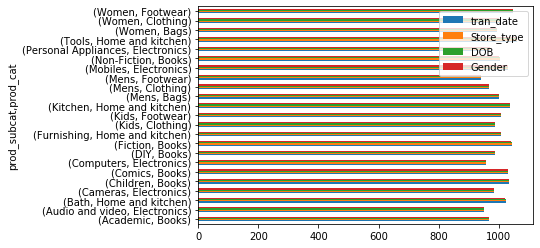

In [117]:
C1.groupby(['prod_subcat','prod_cat']).count().plot(kind = 'barh') ##This is the only way i could think of showing this:

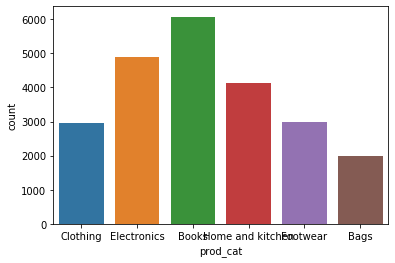

In [119]:
sns.countplot(C1['prod_cat'])
plt.show()

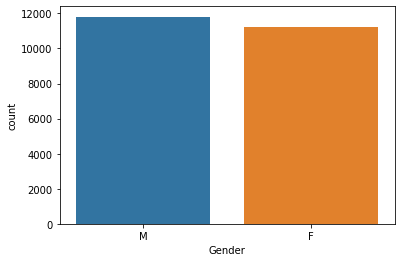

In [120]:
sns.countplot(C1['Gender'])
plt.show()

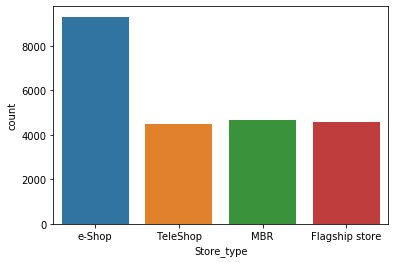

In [102]:
sns.countplot(C1['Store_type'])  ###Countplot for storetype:

# 4. Calculate the following information using the merged dataset :

# a. Time period of the available transaction data

# b. Count of transactions where the total amount of transaction was negative


In [122]:
Customer_Final.columns

Index(['transaction_id', 'cust_id', 'tran_date', 'prod_subcat_code',
       'prod_cat_code', 'Qty', 'Rate', 'Tax', 'total_amt', 'Store_type',
       'customer_Id', 'DOB', 'Gender', 'city_code', 'prod_cat',
       'prod_sub_cat_code', 'prod_subcat'],
      dtype='object')

In [124]:
Customer_Final['tran_date']=pd.to_datetime(Customer_Final['tran_date'])

In [340]:
Customer_Final.dtypes ##Here we have changes this columns to datetime:

transaction_id                int64
cust_id                       int64
tran_date            datetime64[ns]
prod_subcat_code              int64
prod_cat_code                 int64
Qty                           int64
Rate                          int64
Tax                         float64
total_amt                   float64
Store_type                   object
customer_Id                   int64
DOB                  datetime64[ns]
Gender                       object
city_code                   float64
prod_cat                     object
prod_sub_cat_code             int64
prod_subcat                  object
AGE                         float64
dtype: object

In [347]:
max_dt=Customer_Final.tran_date.max()

In [350]:
min_dt=Customer_Final.tran_date.min()

In [348]:
max_dt

Timestamp('2014-12-02 00:00:00')

In [351]:
min_dt

Timestamp('2011-01-02 00:00:00')

In [147]:
from datetime import timedelta as tt

In [149]:
print(dir(tt))

['__abs__', '__add__', '__bool__', '__class__', '__delattr__', '__dir__', '__divmod__', '__doc__', '__eq__', '__floordiv__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__mod__', '__mul__', '__ne__', '__neg__', '__new__', '__pos__', '__radd__', '__rdivmod__', '__reduce__', '__reduce_ex__', '__repr__', '__rfloordiv__', '__rmod__', '__rmul__', '__rsub__', '__rtruediv__', '__setattr__', '__sizeof__', '__str__', '__sub__', '__subclasshook__', '__truediv__', 'days', 'max', 'microseconds', 'min', 'resolution', 'seconds', 'total_seconds']


In [150]:
dela = max_dt - min_dt

In [151]:
print(dela)

1430 days 00:00:00


In [155]:
num_months = (max_dt. year - min_dt. year) * 12 + (max_dt. month - min_dt. month)

In [156]:
num_months

47

**Time range available for the data**

In [158]:
print('year_range',max_dt.year - min_dt.year,'|','day_range',dela,'|','No of months',num_months)

year_range 3 | day_range 1430 days 00:00:00 | No of months 47


# Count of transactions where the total amount of transaction was negative

In [10]:
Customer_Final.loc[Customer_Final.total_amt <=0].count()

transaction_id       2177
cust_id              2177
tran_date            2177
prod_subcat_code     2177
prod_cat_code        2177
Qty                  2177
Rate                 2177
Tax                  2177
total_amt            2177
Store_type           2177
customer_Id          2177
DOB                  2177
Gender               2176
city_code            2177
prod_cat             2177
prod_sub_cat_code    2177
prod_subcat          2177
dtype: int64

In [11]:
###Final Answer for this::
Customer_Final.loc[Customer_Final.total_amt <0,['transaction_id']].count()

transaction_id    2177
dtype: int64

# 5. Analyze which product categories are more popular among females vs male customers.

In [57]:
Customer_Final.groupby(['prod_cat','Gender'])[['Qty','total_amt']].sum().sort_values(['Qty','total_amt'],
                                                                                     ascending=(False,False))

Qty    total_amt
prod_cat         Gender                   
Books            M       7587  6645972.775
                 F       7070  6164692.235
Electronics      M       6476  5703109.425
                 F       5832  5019354.210
Home and kitchen M       5041  4301075.480
                 F       4895  4132177.335
Clothing         M       3748  3224079.495
Footwear         F       3716  3202552.990
                 M       3555  3014672.050
Clothing         F       3425  3026750.805
Bags             F       2362  2077985.650
                 M       2346  2046722.990

In [13]:
Customer_Final.head(2)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_sub_cat_code,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,270351,26-09-1981,M,5.0,Clothing,1,Women
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,270384,11-05-1973,F,8.0,Electronics,5,Computers


# 6. Which City code has the maximum customers and what was the percentage of customers from that city?

In [112]:
Customer_Final.groupby('city_code')['customer_Id'].count()

city_code
1.0     2258
2.0     2270
3.0     2411
4.0     2422
5.0     2360
6.0     2127
7.0     2356
8.0     2330
9.0     2178
10.0    2333
Name: customer_Id, dtype: int64

In [110]:
perc_la = Customer_Final.groupby('city_code')['customer_Id'].count()  ##Here we are getting max count of customers:

**Lets see how to get percentages**

In [111]:
round(perc_la[4.0]  /perc_la.sum() *100,2)  ### Percentage of Customers from that city 

10.51

**Expored final dataset just for the practice**

In [295]:
Customer_Final.to_csv('last.csv',header = True)

In [115]:
Customer_Final.transaction_id.value_counts()

426787191      4
4170892941     4
32263938079    4
3130889793     3
42255136382    3
              ..
19697787670    1
19828697879    1
94745579478    1
58308582161    1
24748789762    1
Name: transaction_id, Length: 20878, dtype: int64

# 7. Which store type sells the maximum products by value and by quantity?

In [135]:
Customer_Final.head(1)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_sub_cat_code,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.3,-4265.3,e-Shop,270351,26-09-1981,M,5.0,Clothing,1,Women


In [131]:
Customer_Final.groupby(['Store_type'])[['Qty','total_amt']].sum().sort_values('Qty',ascending = False) ### Eshop is skyrocketing

,Qty,total_amt
Store_type,,
e-Shop,22763,1.982482e+07
MBR,11194,9.674486e+06
Flagship store,11133,9.715688e+06
TeleShop,10984,9.364781e+06


# 8. What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?

In [149]:
Customer_Final.head(1)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_sub_cat_code,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.3,-4265.3,e-Shop,270351,26-09-1981,M,5.0,Clothing,1,Women


In [168]:
clot_ele=Customer_Final[['Store_type','prod_cat','total_amt']]

In [179]:
clot_elec_final = Customer_Final[(Customer_Final.Store_type=='Flagship store') & (Customer_Final.prod_cat.isin(['Electronics','Clothing']))]

In [180]:
clot_elec_final.groupby('Store_type').total_amt.sum() ###Total amt earned from electronic and clothing from flagship stores:

Store_type
Flagship store    3409559.27
Name: total_amt, dtype: float64

# 9. What was the total amount earned from "Male" customers under the "Electronics" category?

In [177]:
male_final = Customer_Final[(Customer_Final.Gender=='M') & (Customer_Final.prod_cat.isin(['Electronics']))]

In [181]:
male_final.groupby('Gender').total_amt.sum()  ##Combines revenue from male under electronics:

Gender
M    5703109.425
Name: total_amt, dtype: float64

# 10. How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?

In [185]:
Customer_Final.head(1)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_sub_cat_code,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.3,-4265.3,e-Shop,270351,26-09-1981,M,5.0,Clothing,1,Women


In [189]:
uni_tran = Customer_Final[['cust_id','transaction_id','total_amt']]

In [193]:
uni_tran1  = uni_tran[uni_tran.total_amt>=0]

In [207]:
 uni_tran2 = uni_tran1.groupby('cust_id')['transaction_id'].count().reset_index()

In [215]:
uni_tran2

,cust_id,transaction_id
0,266783,4
1,266784,3
2,266785,7
3,266788,4
4,266794,11
...,...,...
5501,275257,4
5502,275261,3
5503,275262,2
5504,275264,2


In [217]:
uni_tran2[uni_tran2.transaction_id >10] ### We have around 6 Customers who have more than 10 transactions

,cust_id,transaction_id
4,266794,11
2426,270535,11
2606,270803,11
3867,272741,11
4032,273014,11
4815,274227,11


# 11. For all customers aged between 25 - 35, find out:

# What was the total amount spent for “Electronics” and “Books” product categories?

# What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?


In [230]:
Customer_Final.head(2)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_sub_cat_code,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,270351,1981-09-26,M,5.0,Clothing,1,Women
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,270384,1973-05-11,F,8.0,Electronics,5,Computers


In [277]:
now = pd.Timestamp('now')
Customer_Final['DOB'] = pd.to_datetime(Customer_Final['DOB'], format='%d-%m-%y')    # 1
Customer_Final['DOB'] = Customer_Final['DOB'].where(Customer_Final['DOB'] < now, Customer_Final['DOB'] -  np.timedelta64(100, 'Y'))   # 2
Customer_Final['AGE'] = (now - Customer_Final['DOB']).astype('<m8[Y]')

In [282]:
Customer_Final.head(2)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_sub_cat_code,prod_subcat,AGE
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,270351,1981-09-26,M,5.0,Clothing,1,Women,38.0
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,270384,1973-05-11,F,8.0,Electronics,5,Computers,47.0


**What was the total amount spent for “Electronics” and “Books” product categories?**

In [286]:
fin_elecbook = Customer_Final[(Customer_Final.AGE >=25) & (Customer_Final.AGE <=35)]

In [288]:
fin_elecbook.head(1)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_sub_cat_code,prod_subcat,AGE
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.11,-1748.11,TeleShop,273420,1992-07-27,M,8.0,Books,6,DIY,27.0


In [290]:
final_elecbook = fin_elecbook[fin_elecbook.prod_cat.isin(['Books','Electronics'])]

In [292]:
##**What was the total amount spent for “Electronics” and “Books” product categories?**
final_elecbook.groupby('prod_cat').total_amt.sum()

prod_cat
Books          4619277.91
Electronics    4125320.81
Name: total_amt, dtype: float64

**b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014**

In [311]:
Customer_Final['tran_date'] = pd.to_datetime(Customer_Final.tran_date)

In [312]:
Customer_Final.head(1)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_sub_cat_code,prod_subcat,AGE
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.3,-4265.3,e-Shop,270351,1981-09-26,M,5.0,Clothing,1,Women,38.0


In [328]:
## What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014

final_cust_report = Customer_Final[(Customer_Final.tran_date>='2014-01-01') & (Customer_Final.tran_date<='2014-03-01') &
              (Customer_Final.AGE >=25) & (Customer_Final.AGE <=35)]

In [332]:
final_cust_report.head(1)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_sub_cat_code,prod_subcat,AGE
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.11,-1748.11,TeleShop,273420,1992-07-27,M,8.0,Books,6,DIY,27.0


In [324]:
final_cust_report.groupby('AGE').total_amt.sum() ## Final amount spent

AGE
27.0     35230.715
28.0     76791.975
29.0     68735.420
30.0     67479.035
31.0    106120.885
32.0     61768.395
33.0     39953.485
34.0     71200.675
35.0     57598.125
Name: total_amt, dtype: float64

In [354]:
final_cust_report.total_amt.sum() ##TOTAL AMOUNT SPENT

584878.71